In [1]:
import sys
sys.path.insert(1, "./src")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from utils.from_kaggle import download_dataset

download_dataset("ruatd-2022-multi-task", True, "./data/multi-task")
download_dataset("ruatd-2022-bi", True, "./data/binary-task")

Directory is already occupied
Directory is already occupied


In [4]:
from datasets.class_dataset import CSVDataset
import yaml

In [5]:
data_config = yaml.load(open("configs/multi_data_config.yaml", 'r'), Loader=yaml.Loader)
model_config = yaml.load(open("configs/deberta_model_config.yaml", 'r'), Loader=yaml.Loader)

In [6]:
train_dataset = CSVDataset(data_config["train_data_path"],
                           is_uncased=data_config["is_uncased"],
                           pretrained_tokenizer=data_config["pretrained_tokenizer_path"],
                           max_length=None,
                           device='cpu')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/home/dev/anaconda3/lib/python3.8/site-packages/transformers/convert_slow_tokenizer.py:454: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [7]:
val_dataset = CSVDataset(data_config["validate_data_path"],
                         is_uncased=data_config["is_uncased"],
                         pretrained_tokenizer=data_config["pretrained_tokenizer_path"],
                         max_length=None,
                         device='cpu')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [8]:
train_data = pd.read_csv('data/multi-task/train.csv')
valid_data = pd.read_csv('data/multi-task/val.csv')

In [9]:
train_data

,Id,Text,Class
0,0,"Программа, сроки и этапы реализации",M2M-100
1,1,Воскресенье. 10.30–11 час. репетиция (прогон в...,Human
2,3,Я много пива не пью.,OPUS-MT
3,9,Самцам тигров приходится успокаивать самку пер...,M2M-100
4,10,Разработанная в результате исследований методи...,Human
...,...,...,...
129061,215102,Октябрь был самый напряженный месяц по обстано...,Human
129062,215106,"Ты в нём первая пара, которая никому не сдалас...",mT5-Large
129063,215107,"По их данным, в Ирак в понедельник вылетели ок...",mT5-Large
129064,215108,Настя спасла станицу с ним.,mT5-Small


In [10]:
len(train_data)

129066

In [11]:
len(valid_data)

21511

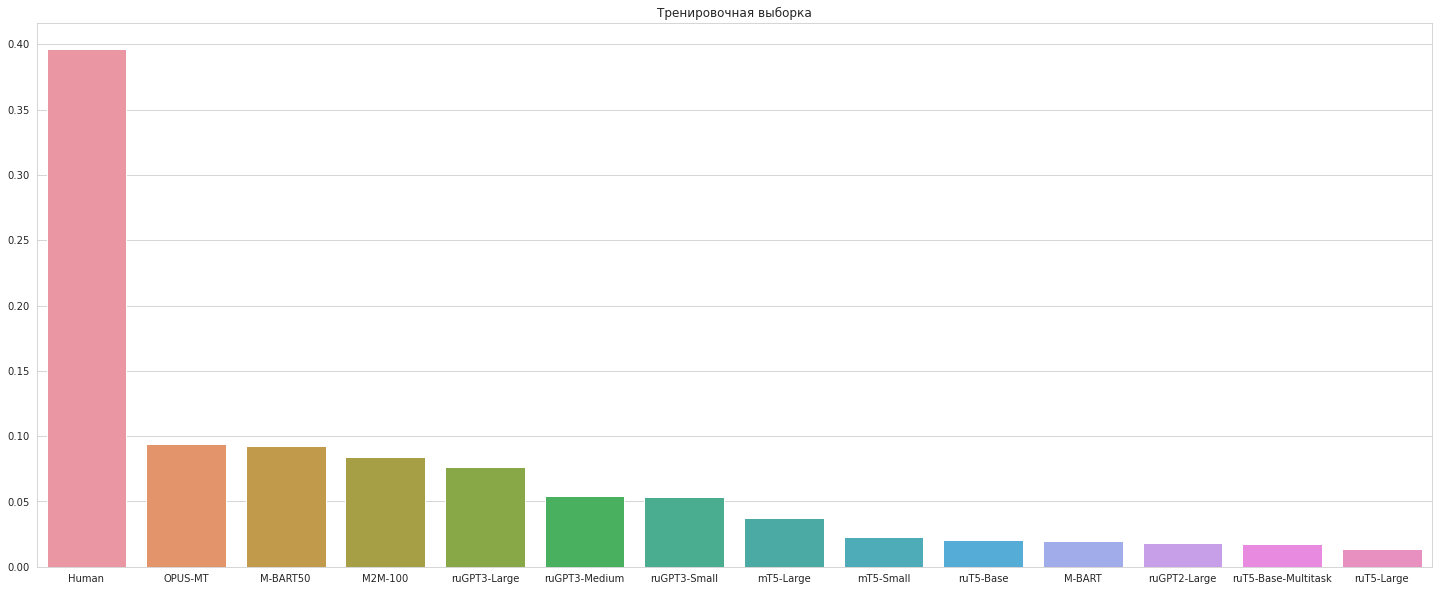

In [12]:
fig = plt.figure(figsize=(25, 10))
with sns.plotting_context(font_scale=1.5), sns.axes_style('whitegrid'), sns.mpl_palette("GnBu_d"):
    data_ = train_data['Class'].value_counts(normalize = True)
    sns.barplot(x=data_.index, y=data_.values).set_title('Тренировочная выборка')

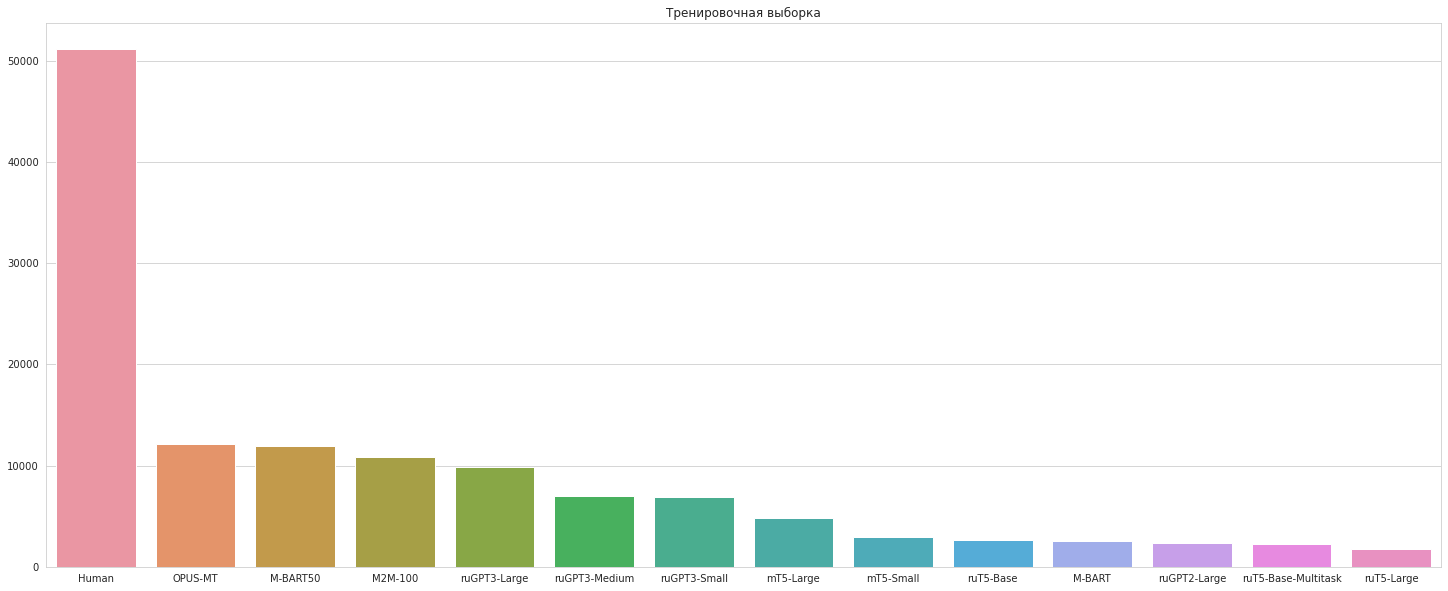

In [13]:
fig = plt.figure(figsize=(25, 10))
with sns.plotting_context(font_scale=1.5), sns.axes_style('whitegrid'), sns.mpl_palette("GnBu_d"):
    data_ = train_data['Class'].value_counts()
    sns.barplot(x=data_.index, y=data_.values).set_title('Тренировочная выборка')

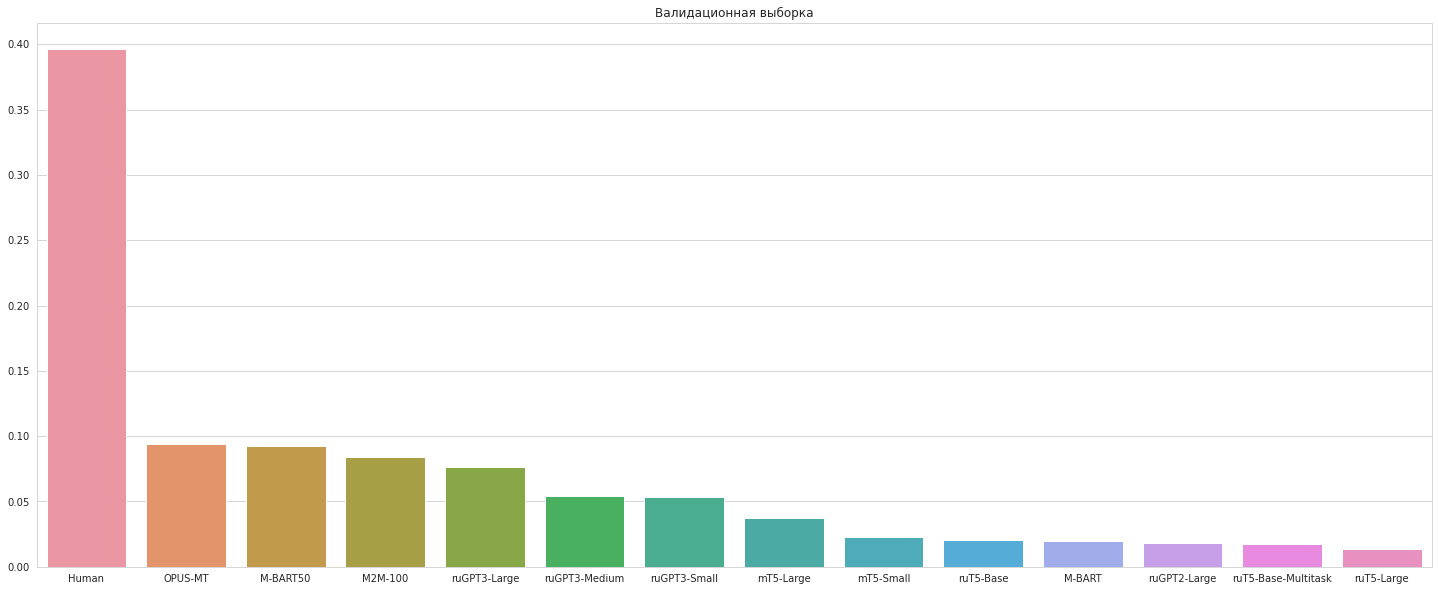

In [14]:
fig = plt.figure(figsize=(25, 10))
with sns.plotting_context(font_scale=1.5), sns.axes_style('whitegrid'), sns.mpl_palette("GnBu_d"):
    data_ = valid_data['Class'].value_counts(normalize = True)
    sns.barplot(x=data_.index, y=data_.values).set_title('Валидационная выборка')

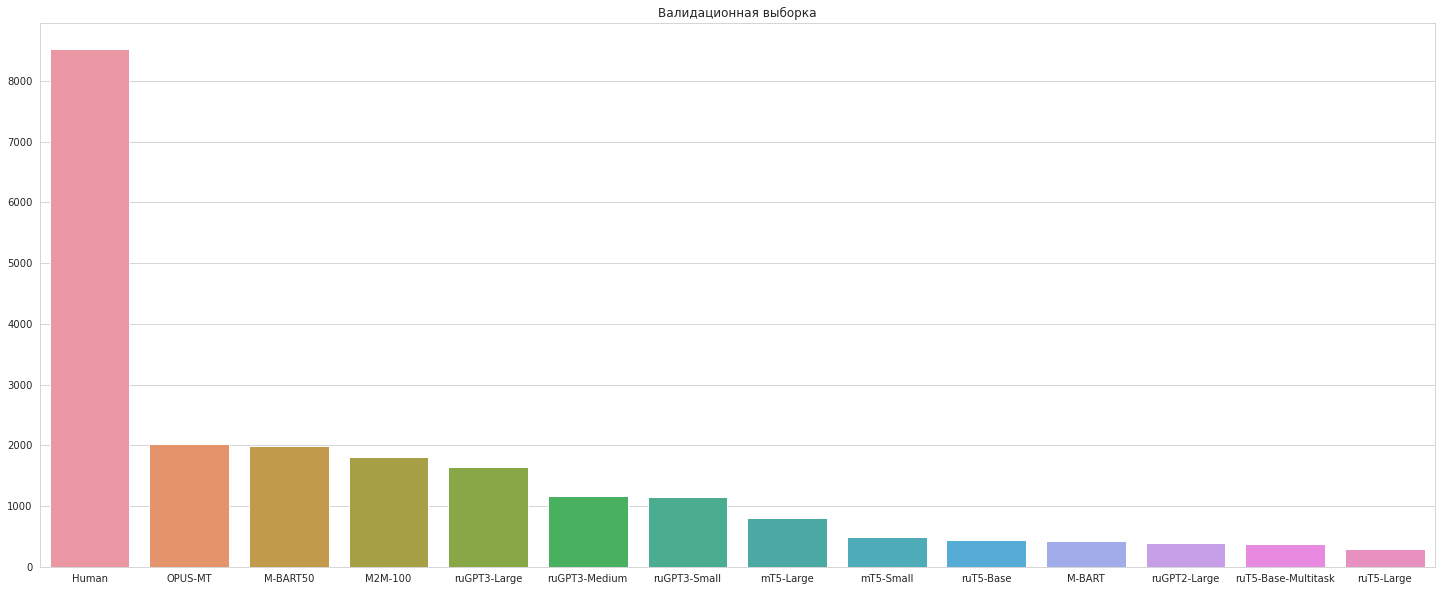

In [15]:
fig = plt.figure(figsize=(25, 10))
with sns.plotting_context(font_scale=1.5), sns.axes_style('whitegrid'), sns.mpl_palette("GnBu_d"):
    data_ = valid_data['Class'].value_counts()
    sns.barplot(x=data_.index, y=data_.values).set_title('Валидационная выборка')

In [16]:
lengths_train = [len(i[1]) for i in train_dataset]
lengths_valid = [len(i[1]) for i in val_dataset]

In [17]:
df_train = pd.DataFrame({'Length':lengths_train})
df_valid = pd.DataFrame({'Length':lengths_valid})

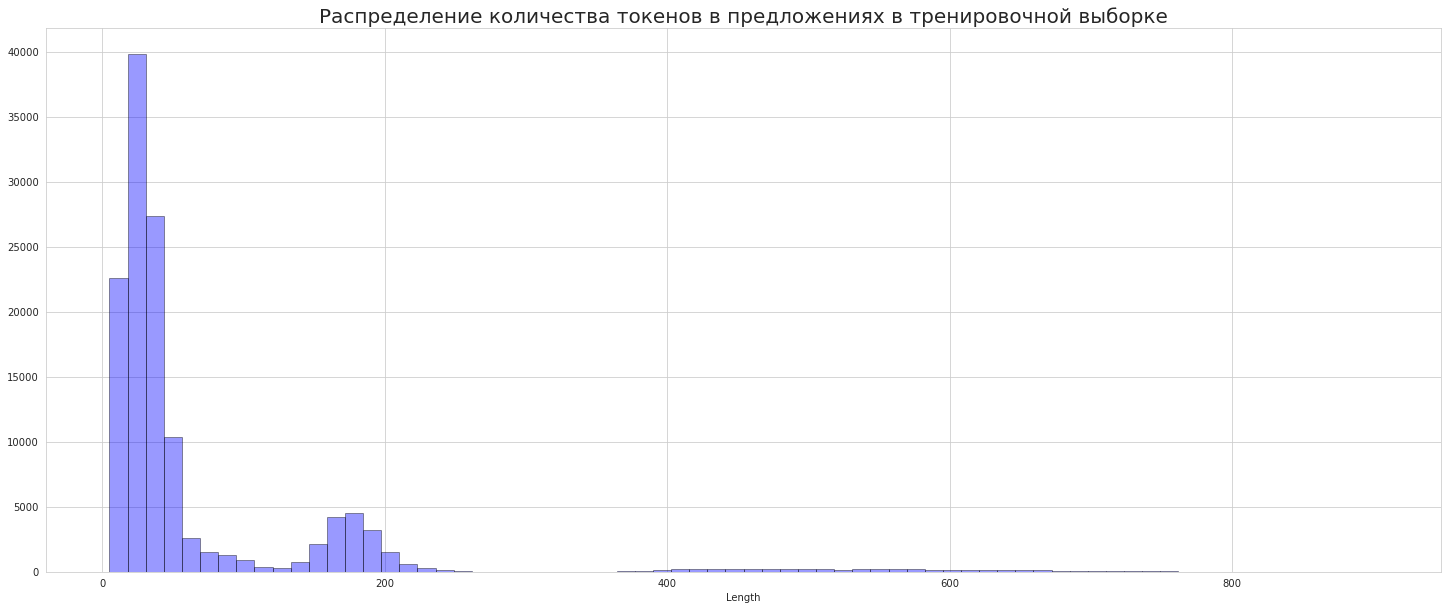

In [31]:
fig = plt.figure(figsize=(25, 10))
with sns.plotting_context(font_scale=1.5), sns.axes_style('whitegrid'), sns.mpl_palette("GnBu_d"):
    sns.distplot(df_train['Length'], hist=True, kde=False, 
                 bins=70, color = 'blue',
                 hist_kws={'edgecolor':'black'})
    plt.title("Распределение количества токенов в предложениях в тренировочной выборке", fontdict = {'fontsize' : 20})

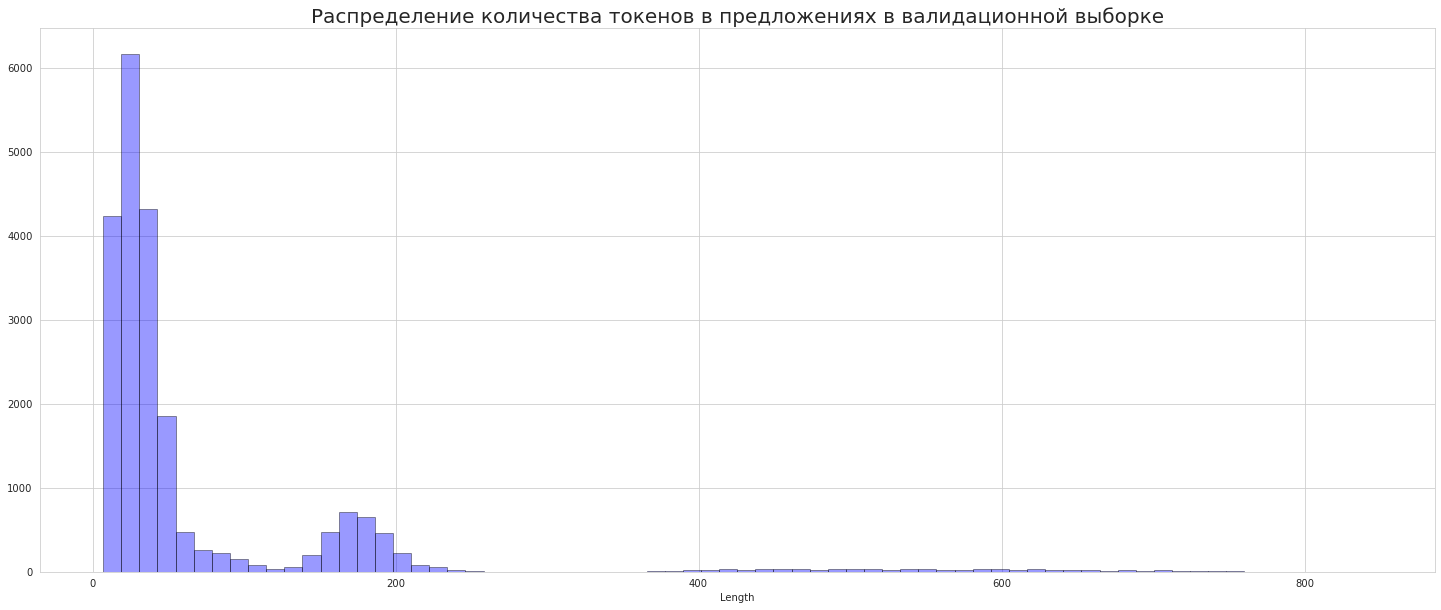

In [32]:
fig = plt.figure(figsize=(25, 10))
with sns.plotting_context(font_scale=1.5), sns.axes_style('whitegrid'), sns.mpl_palette("GnBu_d"):
    sns.distplot(df_valid['Length'], hist=True, kde=False, 
                 bins=70, color = 'blue',
                 hist_kws={'edgecolor':'black'})
    plt.title("Распределение количества токенов в предложениях в валидационной выборке", fontdict = {'fontsize' : 20})

In [33]:
less_than_102_train = len([i for i in lengths_train if i <= 102])

In [34]:
less_than_102_train / len(train_dataset)

0.8221142671191484

In [35]:
less_than_102_valid = len([i for i in lengths_valid if i <= 102])

In [36]:
less_than_102_valid / len(val_dataset)

0.8221839988842917